In [1]:
from playsound import playsound
from pydub import AudioSegment
from pydub.playback import play   
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import librosa
import os
from PIL import Image
import pathlib
#import csv from sklearn.model_selection 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree

# import keras
# from keras import layers
# from keras import layers
# import keras
# from keras.models import Sequential
# import warnings
# warnings.filterwarnings('ignore')

playsound is relying on a python 2 subprocess. Please use `pip3 install PyObjC` if you want playsound to run more efficiently.


In [2]:

file = "audios/wav/neg1.wav"
# Load files
audio_segment = AudioSegment.from_file(file)
# Print attributes
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

Channels: 2
Sample width: 2
Frame rate (sample rate): 44100
Frame width: 4
Length (ms): 981
Frame count: 43277.0
Intensity: -51.32119856629609


In [3]:
file = "audios/wav/neutral10.wav"
# Load files
audio_segment = AudioSegment.from_file(file)
# Print attributes
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

Channels: 1
Sample width: 2
Frame rate (sample rate): 44100
Frame width: 2
Length (ms): 562
Frame count: 24784.0
Intensity: -36.46969664384714


TypeError: 'AxesSubplot' object does not support item assignment

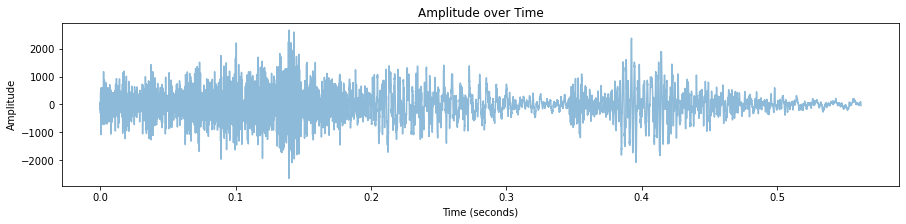

In [12]:
import wave
# Open wav file and read frames as bytes
sf_filewave = wave.open('audios/wav/neutral10.wav', 'r')
signal_sf = sf_filewave.readframes(-1)
# Convert audio bytes to integers
soundwave_sf = np.frombuffer(signal_sf, dtype='int16')
# Get the sound wave frame rate
framerate_sf = sf_filewave.getframerate()
# Find the sound wave timestamps
time_sf = np.linspace(start=0,
                      stop=len(soundwave_sf)/framerate_sf,
                      num=len(soundwave_sf))
# Set up plot
f, ax = plt.subplots(figsize=(15, 3))
# Setup the title and axis titles
plt.title('Amplitude over Time')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
# Add the audio data to the plot
ax[0] = plt.plot(time_sf, soundwave_sf, label='Warm Memories', alpha=0.5)
plt.legend()
plt.show()



TypeError: 'AxesSubplot' object does not support item assignment

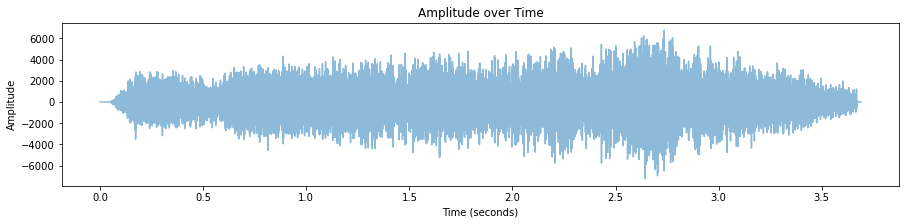

In [13]:
# Open wav file and read frames as bytes
sf_filewave = wave.open('audios/wav/neg3.wav', 'r')
signal_sf = sf_filewave.readframes(-1)
# Convert audio bytes to integers
soundwave_sf = np.frombuffer(signal_sf, dtype='int16')
# Get the sound wave frame rate
framerate_sf = sf_filewave.getframerate()
# Find the sound wave timestamps
time_sf = np.linspace(start=0,
                      stop=len(soundwave_sf)/framerate_sf,
                      num=len(soundwave_sf))
# Set up plot
f, ax = plt.subplots(figsize=(15, 3))
# Setup the title and axis titles
plt.title('Amplitude over Time')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
# Add the audio data to the plot
ax[0] = plt.plot(time_sf, soundwave_sf, label='Warm Memories', alpha=0.5)
plt.legend()
plt.show()

<ipython-input-34-0ccf6b1e3b0c>:12: FutureWarning: Pass y=[ 0.0050326  -0.00077589 -0.00039628 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
<ipython-input-34-0ccf6b1e3b0c>:27: FutureWarning: Pass y=[0.0150326  0.00922411 0.00960372 ... 0.01       0.01       0.01      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
<ipython-input-34-0ccf6b1e3b0c>:32: FutureWarning: Pass y=[0.0150326  0.00922411 0.00960372 ... 0.01       0.01       0.01      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
<ipython-input-34-0ccf6b1e3b0c>:33: FutureWarning: Pass y=[0.0150326  0.00922411 0.00960372 ... 0.01

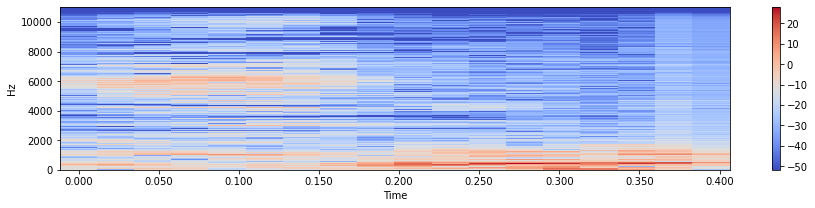

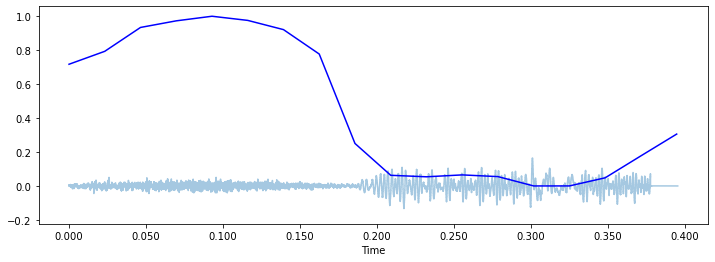

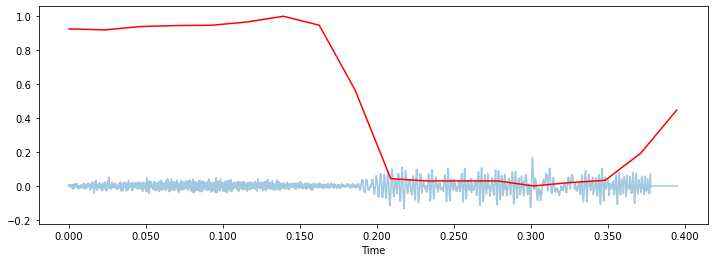

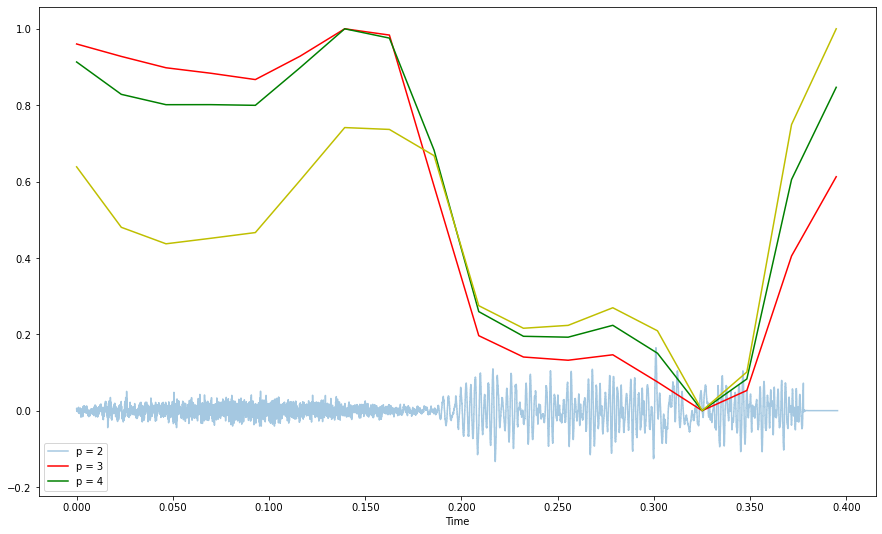

In [34]:
import librosa
import librosa.display

x, sr = librosa.load('audios/wav/neutral5.wav')
# Spectrogram of frequency
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')


spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

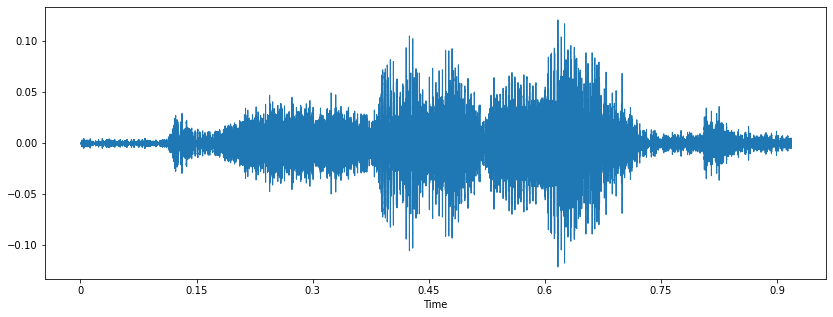

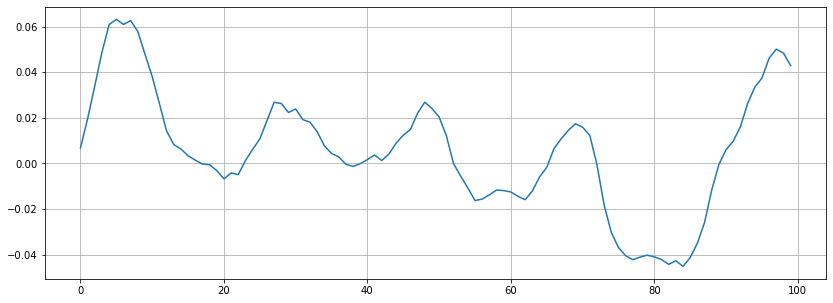

In [37]:
x, sr = librosa.load('Audios/wav/neutral2.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

## The features to extract
pitch (median), pitch range, energy, loudness, jitter, shimme

## Read the files and create pd table

In [37]:
# Get the list of all files and directories
path = "Audios/wav"
dir_list = os.listdir(path)


files_lst = [] #names of the files
label_lst = [] # labels 
for i in range(len(dir_list)):
    if '.wav' in dir_list[i]:
        files_lst.append(dir_list[i])
        if 'neg' in dir_list[i]:
            label_lst.append('negative')
        if 'neutral' in dir_list[i]:
            label_lst.append('neutral')
        if 'pos' in dir_list[i]:
            label_lst.append('positive') 
            
            
path_to_wav = "audios/wav/" #path to the folder
#features
channels_lst = []
sample_width_lst = []
rmse_lst = []
chroma_stft_lst = []
spec_cent_lst = []
spec_bw_lst = []
rolloff_lst = []
zcr_lst = []
mfcc_lst = []

for i in range(len(files_lst)):
    file = path_to_wav + files_lst[i]
    y, sr = librosa.load(file, mono=True, duration=30)
    
    rmse = librosa.feature.rms(y=y)
    rmse_lst.append(np.mean(rmse))
    
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_stft_lst.append(np.mean(chroma_stft))
    
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_cent_lst.append(np.mean(spec_cent))
    
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spec_bw_lst.append(np.mean(spec_bw))
    
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_lst.append(np.mean(rolloff))
    
    zcr = librosa.feature.zero_crossing_rate(y)
    zcr_lst.append(np.mean(zcr))
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    mfcc_lst.append(np.mean(mfcc))
    
    
# dictionary of lists to create df
dict = {'file_name': files_lst,
        'rmse' : rmse_lst,   'chroma_stft': chroma_stft_lst, 'spec_cent': spec_cent_lst,
        'spec_bw' : spec_bw_lst, 'rolloff': rolloff_lst, 'zcr': zcr_lst, 'mfcc': mfcc_lst,
        'label' : label_lst} 
    
df = pd.DataFrame(dict)

In [44]:
data = df.drop(['file_name'],axis=1)#Encoding the Labels
labels = data.iloc[:, -1]
#encoder = LabelEncoder()
#y = encoder.fit_transform(labels)#Scaling the Feature columns
#scaler = StandardScaler()
#X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
y = labels
X = data.iloc[:, 0:7]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
X_train.count()

rmse           33
chroma_stft    33
spec_cent      33
spec_bw        33
rolloff        33
zcr            33
mfcc           33
dtype: int64

In [46]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


In [47]:
result = clf.predict(X_test)
print(result)
print(y_test)
len(y_test)

['neutral' 'neutral' 'negative' 'neutral' 'neutral' 'negative' 'negative'
 'negative' 'negative' 'negative' 'neutral' 'negative' 'negative'
 'neutral' 'neutral']
0      neutral
7     negative
39    negative
3      neutral
5      neutral
36     neutral
19    negative
2     negative
4     negative
9      neutral
22     neutral
35    negative
31     neutral
32    negative
34    negative
Name: label, dtype: object


15